# K-Means Clustering

## Importing the libraries

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [119]:
Targ='tds'

In [120]:
dataset = pd.read_csv('tds.csv')
dataset.head()

,t,sta,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds,vol
0,3/20/1990,Banks PP,193,152,10.48,6,79.37,445.0,250.0,440.85
1,4/18/1990,Banks PP,520,155,7.75,4,59.34,706.0,375.0,746.09
2,5/15/1990,Banks PP,381,132,31.47,3,70.67,698.0,385.0,618.14
3,6/19/1990,Banks PP,254,126,27.14,6,108.10,615.0,350.0,521.24
4,7/18/1990,Banks PP,242,150,6.70,2,99.73,385.0,218.0,500.43


In [121]:
dataset = pd.read_csv("tds.csv")
x = dataset[['ec_mtz','ec_sac','ec_sjr','ec_east','ec_ag','ec',Targ]]
#x = dataset[['ec',Targ]]

x = pd.DataFrame(x)

In [122]:
x.head()

,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds
0,193,152,10.48,6,79.37,445.0,250.0
1,520,155,7.75,4,59.34,706.0,375.0
2,381,132,31.47,3,70.67,698.0,385.0
3,254,126,27.14,6,108.10,615.0,350.0
4,242,150,6.70,2,99.73,385.0,218.0


## Using the elbow method to find the optimal number of clusters

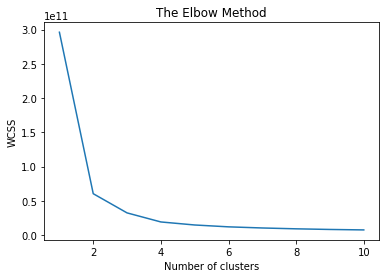

In [123]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [124]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans = pd.DataFrame(y_kmeans)

In [125]:
x['y_Kmean']=y_kmeans

In [126]:
x.head(100)

,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds,y_Kmean
0,193,152,10.48,6,79.37,445.0,250.0,0
1,520,155,7.75,4,59.34,706.0,375.0,0
2,381,132,31.47,3,70.67,698.0,385.0,0
3,254,126,27.14,6,108.10,615.0,350.0,0
4,242,150,6.70,2,99.73,385.0,218.0,0
...,...,...,...,...,...,...,...,...
95,30,40,160.49,2,271.71,462.0,258.0,0
96,29,38,152.42,2,350.48,467.0,265.0,0
97,28,37,148.44,2,381.45,702.0,399.0,0
98,12,16,163.87,1,189.72,380.0,212.0,0


In [127]:
dataset['Kmean']=y_kmeans

In [128]:
dataset.head()

,t,sta,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds,vol,Kmean
0,3/20/1990,Banks PP,193,152,10.48,6,79.37,445.0,250.0,440.85,0
1,4/18/1990,Banks PP,520,155,7.75,4,59.34,706.0,375.0,746.09,0
2,5/15/1990,Banks PP,381,132,31.47,3,70.67,698.0,385.0,618.14,0
3,6/19/1990,Banks PP,254,126,27.14,6,108.10,615.0,350.0,521.24,0
4,7/18/1990,Banks PP,242,150,6.70,2,99.73,385.0,218.0,500.43,0


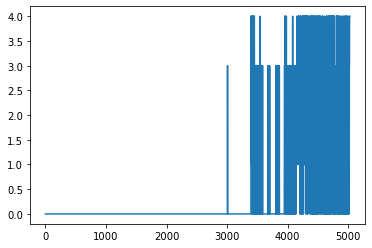

In [129]:
plt.plot(dataset['Kmean'])

In [130]:
station = dataset['sta'].unique()

In [133]:
for j in station:
    print((j),dataset[dataset['sta']== (j)]['Kmean'].unique())

Banks PP [0]
BANKS [0]
CLIFTON [0]
Clifton Court Intake [0]
C9 [0]
WSTCANCLIFT [0]
DMC [0]
OLDR-DMC-CLIFT [0]
OLDRIVDMC [0]
OLDRIVBACISL [0]
CONCOSPP1 [0]
STATION09 [0]
GRANTOLD [0]
SANTAFEBACON [0]
MIDDLER [0]
NVICWOOD [0]
MRIVBACON [0]
SANDMOUND [0]
ROCKSL [0]
NORTHCAN [0]
DELTACRCHAN [0]
North Bay Aqueduct [0]
STATION04B [0]
FALSETIP-WEBB [0]
MD10 [0]
MD10A [0]
MD7A [0]
P10A [0]
P12 [0]
P12A [0]
P8 [0]
D19 [0]
D26 [0]
D28A [0]
C10 [0 3]
C10A [0]
C3 [0]
C7 [0]
D10 [4 3 1 0]
D11 [3 0]
D12 [3 0 4]
D14A [0]
D15 [0 3]
D16 [0]
D22 [0 3]
D24 [0]
D4 [3 4 0]
D6 [2 1 4 3 0]
D7 [4 1 2 3 0]
D8 [1 4 0 3]
D9 [4 3 1 0]
SJRJERSEY [0]
MALLARDIS [4 3 1 0]


In [135]:
for j in station:
    for i in range (0,5):
        print((j),'Zone',(i+1),'=', dataset[(dataset.sta== j) & (dataset.Kmean==i)].tds.count())

Banks PP Zone 1 = 222
Banks PP Zone 2 = 0
Banks PP Zone 3 = 0
Banks PP Zone 4 = 0
Banks PP Zone 5 = 0
BANKS Zone 1 = 224
BANKS Zone 2 = 0
BANKS Zone 3 = 0
BANKS Zone 4 = 0
BANKS Zone 5 = 0
CLIFTON Zone 1 = 132
CLIFTON Zone 2 = 0
CLIFTON Zone 3 = 0
CLIFTON Zone 4 = 0
CLIFTON Zone 5 = 0
Clifton Court Intake Zone 1 = 114
Clifton Court Intake Zone 2 = 0
Clifton Court Intake Zone 3 = 0
Clifton Court Intake Zone 4 = 0
Clifton Court Intake Zone 5 = 0
C9 Zone 1 = 68
C9 Zone 2 = 0
C9 Zone 3 = 0
C9 Zone 4 = 0
C9 Zone 5 = 0
WSTCANCLIFT Zone 1 = 20
WSTCANCLIFT Zone 2 = 0
WSTCANCLIFT Zone 3 = 0
WSTCANCLIFT Zone 4 = 0
WSTCANCLIFT Zone 5 = 0
DMC Zone 1 = 104
DMC Zone 2 = 0
DMC Zone 3 = 0
DMC Zone 4 = 0
DMC Zone 5 = 0
OLDR-DMC-CLIFT Zone 1 = 15
OLDR-DMC-CLIFT Zone 2 = 0
OLDR-DMC-CLIFT Zone 3 = 0
OLDR-DMC-CLIFT Zone 4 = 0
OLDR-DMC-CLIFT Zone 5 = 0
OLDRIVDMC Zone 1 = 18
OLDRIVDMC Zone 2 = 0
OLDRIVDMC Zone 3 = 0
OLDRIVDMC Zone 4 = 0
OLDRIVDMC Zone 5 = 0
OLDRIVBACISL Zone 1 = 191
OLDRIVBACISL Zone 2 = 0
O

In [92]:
for i in range(0,5):
    print('Zone =' ,(i+1), '=', dataset[dataset['Kmean']== i]['sta'].unique())

Zone = 1 = ['Banks PP' 'BANKS' 'CLIFTON' 'Clifton Court Intake' 'C9' 'WSTCANCLIFT'
 'DMC' 'OLDR-DMC-CLIFT' 'OLDRIVDMC' 'OLDRIVBACISL' 'CONCOSPP1' 'STATION09'
 'GRANTOLD' 'SANTAFEBACON' 'MIDDLER' 'NVICWOOD' 'MRIVBACON' 'SANDMOUND'
 'ROCKSL' 'NORTHCAN' 'DELTACRCHAN' 'North Bay Aqueduct' 'STATION04B'
 'FALSETIP-WEBB' 'MD10' 'MD10A' 'MD7A' 'P10A' 'P12' 'P12A' 'P8' 'D19'
 'D26' 'D28A' 'C10' 'C10A' 'C3' 'C7' 'D10' 'D11' 'D12' 'D14A' 'D15' 'D16'
 'D22' 'D24' 'D4' 'D6' 'D7' 'D8' 'D9' 'SJRJERSEY' 'MALLARDIS']
Zone = 2 = ['D10' 'D6' 'D7' 'D8' 'D9' 'MALLARDIS']
Zone = 3 = ['C10' 'D10' 'D11' 'D12' 'D15' 'D22' 'D4' 'D6' 'D7' 'D8' 'D9' 'MALLARDIS']
Zone = 4 = ['D6' 'D7']
Zone = 5 = ['D10' 'D12' 'D4' 'D6' 'D7' 'D8' 'D9' 'MALLARDIS']


## Visualising the clusters